In [15]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [22]:
# load and inspect data
epl_data = pd.read_csv("DataFiles/premier-league-tables.csv")
epl_data.head()

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,? European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,? UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN


In [26]:
#Drop the Notes column
epl_data.drop(columns={"Notes"} ,inplace = True)

### Data Cleaning

In [28]:
# check for null values 
epl_data.isnull().sum()

Season_End_Year    0
Team               0
Rk                 0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
dtype: int64

In [30]:
# check for duplicates
epl_data[epl_data.duplicated()]

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts


### We have zero null values and zero duplicates

### Feature Engineering

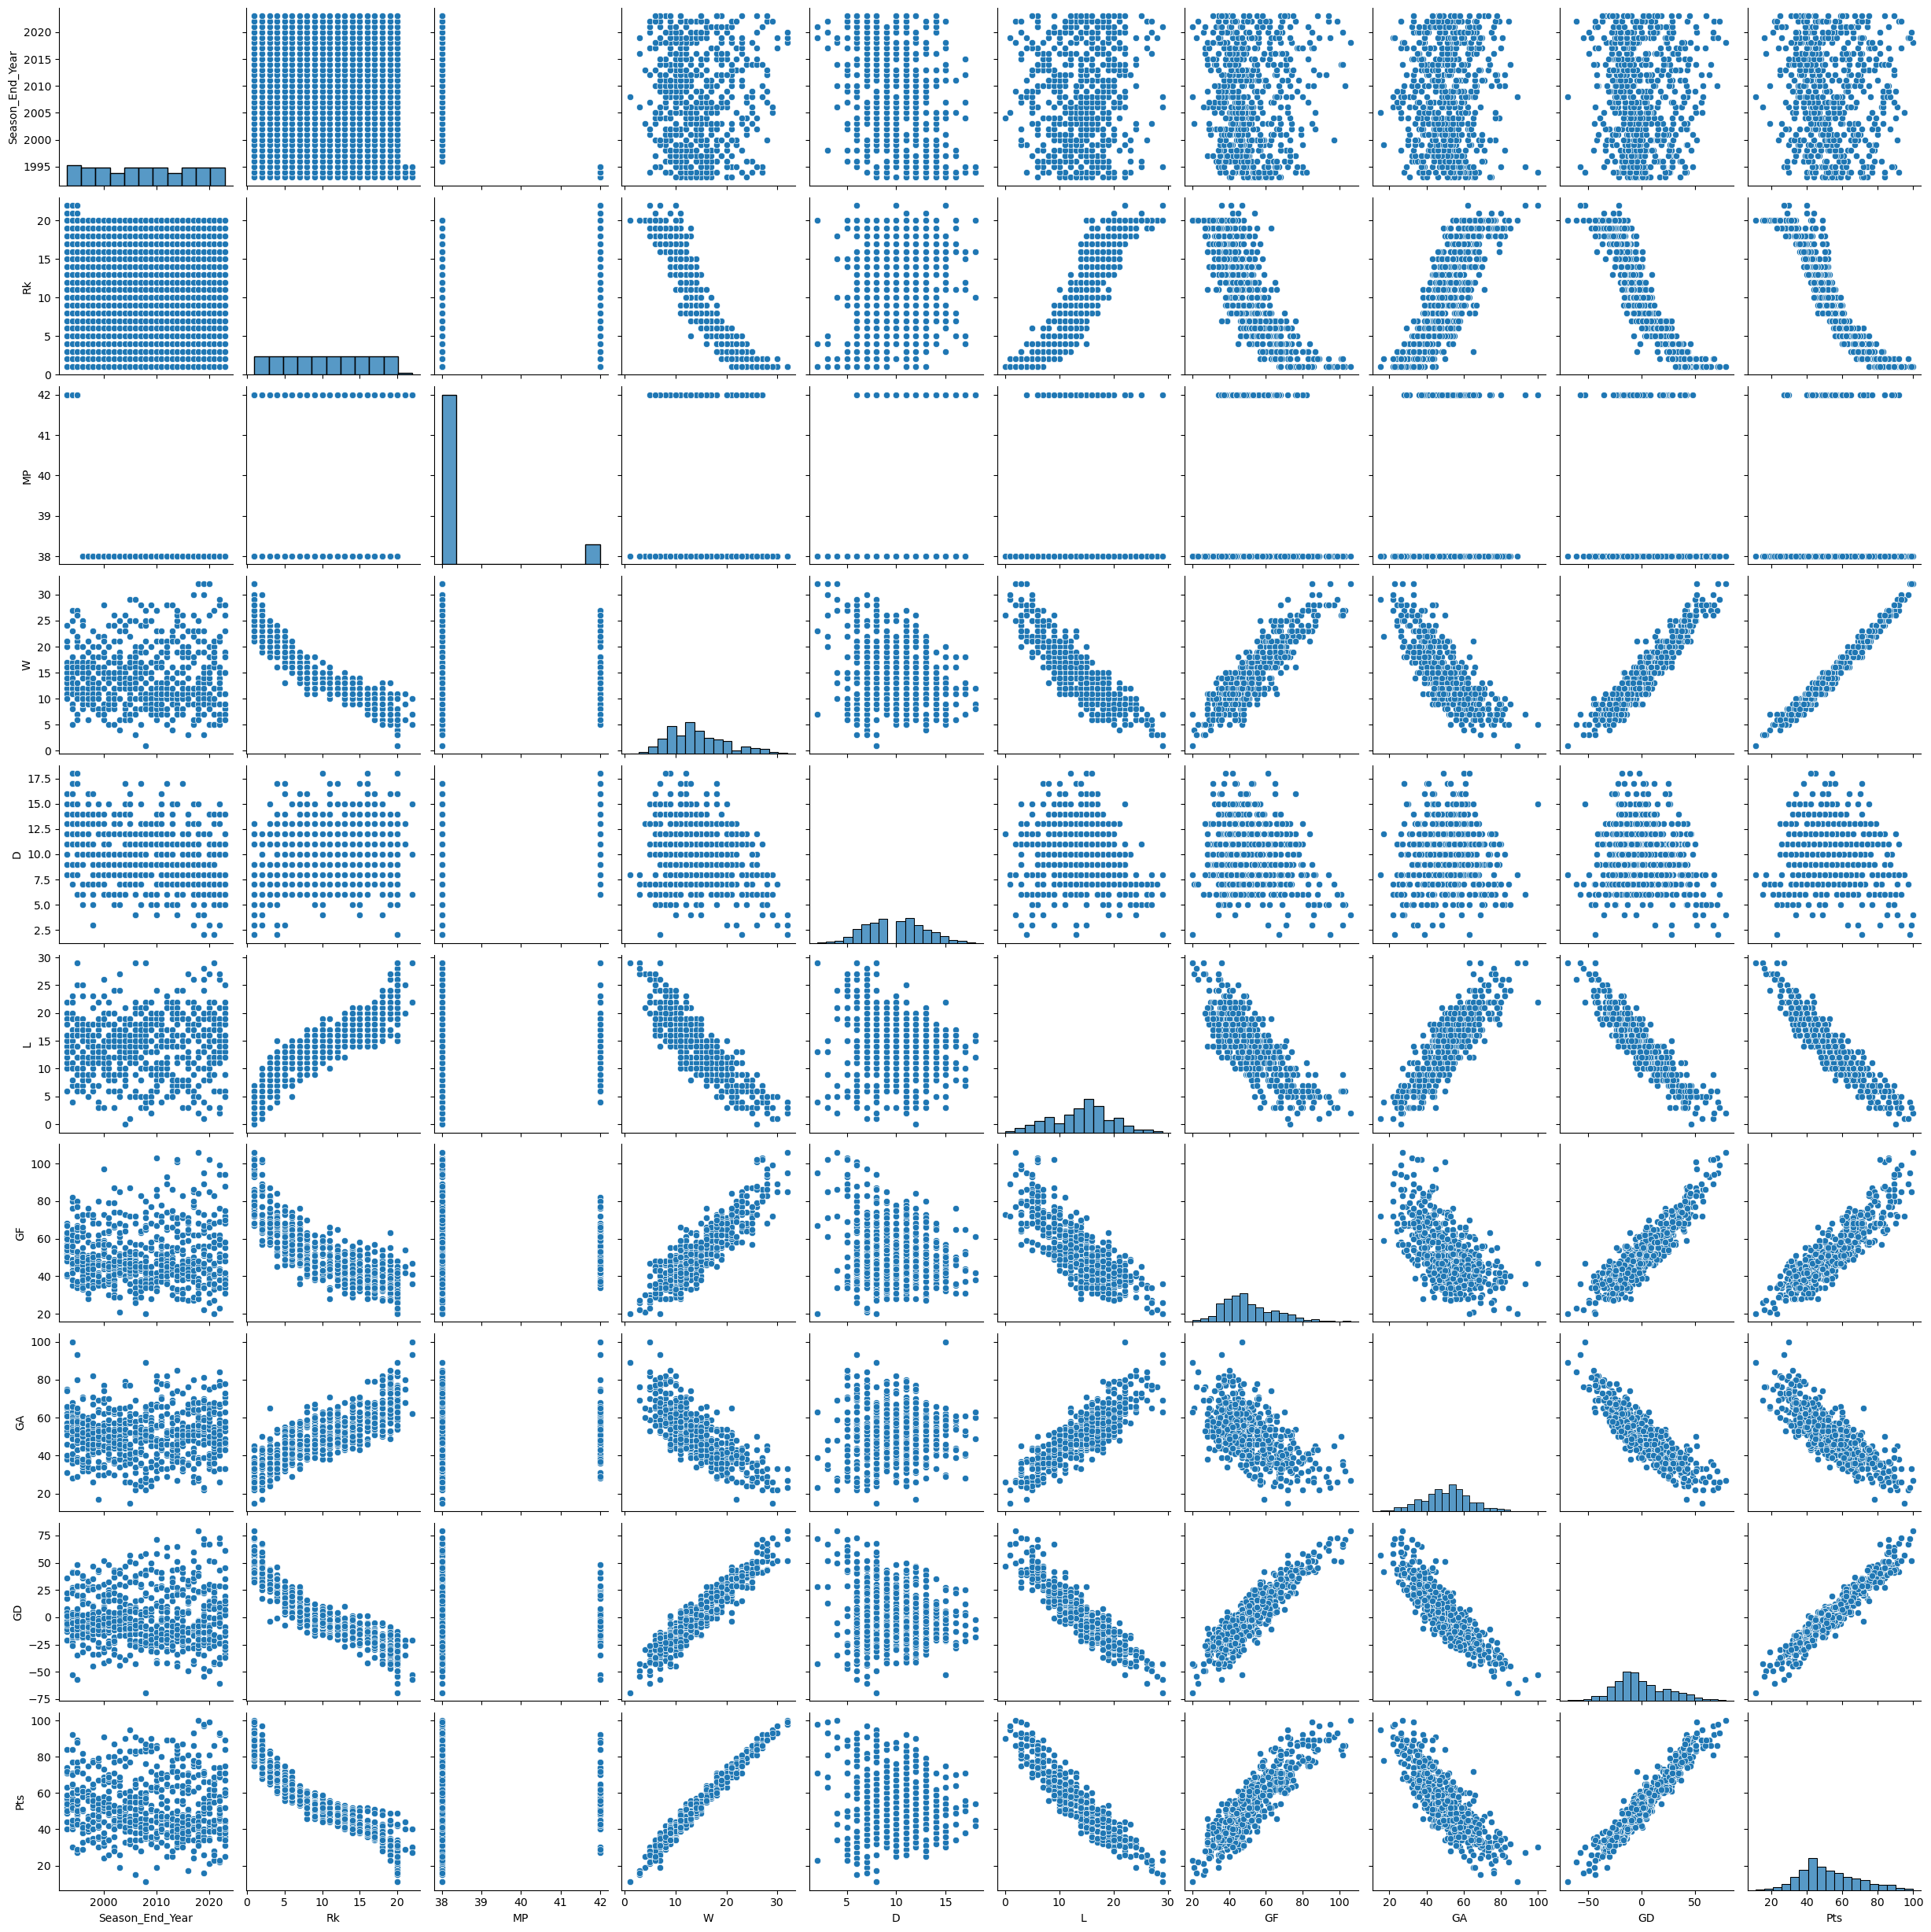

In [34]:
sns.pairplot(epl_data)

In [36]:
epl_data.columns

Index(['Season_End_Year', 'Team', 'Rk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts'],
      dtype='object')

In [38]:
# Create 'winner' column: 1 if rank is 1, otherwise 0
epl_data['winner'] = epl_data['Rk'].apply(lambda x: 1 if x == 1 else 0)

In [40]:
epl_data

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,winner
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,0
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,0
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,0
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,0
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
621,2023,Nott'ham Forest,16,38,9,11,18,38,68,-30,38,0
622,2023,Southampton,20,38,6,7,25,36,73,-37,25,0
623,2023,Tottenham,8,38,18,6,14,70,63,7,60,0
624,2023,West Ham,14,38,11,7,20,42,55,-13,40,0


In [78]:
# Convert 'Team' to categorical and assign integer codes
epl_data["Team_encoded"] = epl_data["Team"].astype("category").cat.codes
epl_data["Year_encoded"] = epl_data["Season_End_Year"].astype("category").cat.codes



In [80]:
epl_data.head(60)

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,winner,Team_encoded,Year_encoded
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,0,0,0
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,0,1,0
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,0,4,0
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,0,14,0
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,0,15,0
5,1993,Crystal Palace,20,42,11,16,15,48,61,-13,49,0,16,0
6,1993,Everton,13,42,15,8,19,53,55,-2,53,0,18,0
7,1993,Ipswich Town,16,42,12,16,14,50,55,-5,52,0,22,0
8,1993,Leeds United,17,42,12,15,15,57,62,-5,51,0,23,0
9,1993,Liverpool,6,42,16,11,15,62,55,7,59,0,25,0


In [106]:
#Split data into features(x) and target(y)
x=epl_data.drop(columns={"winner","Team","Season_End_Year","Rk"})
y=epl_data["winner"]

In [108]:
#Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [112]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


Accuracy: 0.9627659574468085
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       181
           1       0.50      0.43      0.46         7

    accuracy                           0.96       188
   macro avg       0.74      0.71      0.72       188
weighted avg       0.96      0.96      0.96       188

Confusion Matrix:
[[178   3]
 [  4   3]]


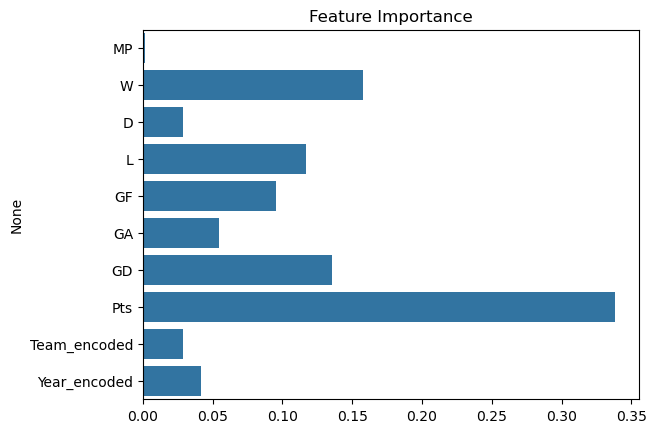

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importances = model.feature_importances_

# Plot the feature importance
sns.barplot(x=feature_importances, y=x.columns)
plt.title('Feature Importance')
plt.show()


In [116]:
# Create a DataFrame with new data
data = {
    'Team': ['Chelsea', 'ManCity', 'Arsenal'],
    'MP': [38, 38, 38],
    'W': [28, 30, 26],
    'D': [5, 4, 7],
    'L': [5, 4, 5],
    'GF': [85, 90, 80],
    'GA': [32, 25, 35],
    'GD': [53, 65, 45],
    'Pts': [89, 94, 85],
    'Season_End_Year': [2024, 2024, 2024]
}

epl_new = pd.DataFrame(data)

# Display the new data
epl_new.head()

,Team,MP,W,D,L,GF,GA,GD,Pts,Season_End_Year
0,Chelsea,38,28,5,5,85,32,53,89,2024
1,ManCity,38,30,4,4,90,25,65,94,2024
2,Arsenal,38,26,7,5,80,35,45,85,2024


In [118]:
# Assuming you have a dataframe df_new for the upcoming season
epl_new["Team_encoded"] = epl_new["Team"].astype("category").cat.codes
epl_new["Year_encoded"] = epl_new["Season_End_Year"].astype("category").cat.codes


In [122]:
# Drop unnecessary columns like 'Team' and 'Season_End_Year' since we encoded them
x_new = epl_new[['MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Team_encoded', 'Year_encoded']]


In [124]:
# Assuming your trained logistic regression model is named 'logreg'
predictions = model.predict(x_new)

# Add predictions to the new dataframe
epl_new['Predicted_Winner'] = predictions


In [126]:
# Display the teams predicted to win
predicted_winner = epl_new[epl_new['Predicted_Winner'] == 1]
print("Predicted Winner(s):")
print(predicted_winner[['Team', 'Season_End_Year']])


Predicted Winner(s):
      Team  Season_End_Year
0  Chelsea             2024
1  ManCity             2024
